#**Финтех-школа**
##**11.4 Задание.Python**

# Задание 0.
*   Подключим все необходимые библиотеки
*   Считаем данные
*   Посмотрим базовые характеристики датасета


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
xls = pd.ExcelFile("task.xlsx")

In [3]:
description = pd.read_excel(xls,"описание данных")
df = pd.read_excel(xls,"dataset")

In [4]:
description

,Параметр,Описание,Unnamed: 2
0,app_dt,дата оставления заявки,NaN
1,device_type,тип устройства с которого оставили заявку,"mobile - телефон, desktop - компьютер"
2,product_name,название карточного продукта,NaN
3,app_stage,стадия рассмотрения заявки,NaN
4,channel_name,"рекламный канал, с которого пришла заявка",NaN
5,age,возраст заявителя,NaN
6,region_size,тип региона заявителя,NaN
7,apps,число заявок,NaN
8,accounts,число открытых счетов,NaN
9,utilizations,"показывает факт того, что клиент начал пользов...",NaN


In [5]:
df

,app_dt,device_type,product_name,app_stage,channel_name,age,region_size,apps,accounts,utilizations
0,2021-09-21,mobile,Debit Card Drive,одобрено,Партнерские сети,40-49,ГОРОД,208,208,83
1,2021-11-01,mobile,Debit Card Drive,одобрено,Партнерские сети,14-17,неизвестно,205,205,24
2,2021-10-27,mobile,Debit Card Drive,одобрено,Партнерские сети,14-17,неизвестно,203,203,103
3,2021-11-05,mobile,Debit Card Drive,одобрено,Партнерские сети,30-39,ГОРОД,199,199,93
4,2021-09-25,mobile,Debit Card Tinkoff Black,одобрено,Контекстная реклама,30-39,ГОРОД,193,193,7
...,...,...,...,...,...,...,...,...,...,...
46005,2021-11-08,mobile,Debit Card Tinkoff Black,отказано,Таргетированная реклама,60-69,ГОРОД,1,0,0
46006,2021-11-10,mobile,Debit Card Tinkoff Black,отказано,Таргетированная реклама,60-69,ГОРОД,1,0,0
46007,2021-11-22,mobile,Debit Card Tinkoff Black,отказано,Таргетированная реклама,60-69,ГОРОД,1,0,0
46008,2021-11-24,desktop,Debit Card Tinkoff Black,отказано,Таргетированная реклама,60-69,ПОСЕЛОК,1,0,0


#Задание 1.
Выполнить анализ датасета и при необходимости предобработать данные.

**Посмотрим базовые агрегирующие функции по численным признакам.**

In [6]:
df.describe()

,apps,accounts,utilizations
count,46010.000000,46010.000000,46010.000000
mean,6.076614,4.744316,1.728124
std,8.358921,8.413138,3.977977
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,4.000000,2.000000,0.000000
75%,8.000000,8.000000,2.000000
max,208.000000,208.000000,131.000000


**Также взглянем на типы данных и размеры датасета.**

In [7]:
df.shape

(46010, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46010 entries, 0 to 46009
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   app_dt        46010 non-null  datetime64[ns]
 1   device_type   46010 non-null  object        
 2   product_name  46010 non-null  object        
 3   app_stage     46010 non-null  object        
 4   channel_name  46010 non-null  object        
 5   age           45964 non-null  object        
 6   region_size   44661 non-null  object        
 7   apps          46010 non-null  int64         
 8   accounts      46010 non-null  int64         
 9   utilizations  46010 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 3.5+ MB


**Проверим датасет на наличие пустых значений.**

Также в таблице присутствуют значение "неизвестно", вряд ли это является ошибокй, а наоборот спецаильное значение, для случаев, когда не удалось определить тип региона и возрастную категорию.

In [9]:
df.isnull().sum()

app_dt             0
device_type        0
product_name       0
app_stage          0
channel_name       0
age               46
region_size     1349
apps               0
accounts           0
utilizations       0
dtype: int64

**Пропуски есть только в категориальных признаках, поэтому заполним их модами в соотвествии с признаком.**

In [10]:
df['age'].fillna(df['age'].mode()[0], inplace = True)
df['region_size'].fillna(df['region_size'].mode()[0], inplace = True)

In [11]:
df.isnull().sum()

app_dt          0
device_type     0
product_name    0
app_stage       0
channel_name    0
age             0
region_size     0
apps            0
accounts        0
utilizations    0
dtype: int64

In [12]:
df

,app_dt,device_type,product_name,app_stage,channel_name,age,region_size,apps,accounts,utilizations
0,2021-09-21,mobile,Debit Card Drive,одобрено,Партнерские сети,40-49,ГОРОД,208,208,83
1,2021-11-01,mobile,Debit Card Drive,одобрено,Партнерские сети,14-17,неизвестно,205,205,24
2,2021-10-27,mobile,Debit Card Drive,одобрено,Партнерские сети,14-17,неизвестно,203,203,103
3,2021-11-05,mobile,Debit Card Drive,одобрено,Партнерские сети,30-39,ГОРОД,199,199,93
4,2021-09-25,mobile,Debit Card Tinkoff Black,одобрено,Контекстная реклама,30-39,ГОРОД,193,193,7
...,...,...,...,...,...,...,...,...,...,...
46005,2021-11-08,mobile,Debit Card Tinkoff Black,отказано,Таргетированная реклама,60-69,ГОРОД,1,0,0
46006,2021-11-10,mobile,Debit Card Tinkoff Black,отказано,Таргетированная реклама,60-69,ГОРОД,1,0,0
46007,2021-11-22,mobile,Debit Card Tinkoff Black,отказано,Таргетированная реклама,60-69,ГОРОД,1,0,0
46008,2021-11-24,desktop,Debit Card Tinkoff Black,отказано,Таргетированная реклама,60-69,ПОСЕЛОК,1,0,0


**Посмотрим, есть ли полные дубликаты в датасете.**

In [13]:
print("Количество дубликатов до удаления:", df.duplicated().sum())

Количество дубликатов до удаления: 352


**Причины возникновения дубликатов:**
* Ошибка в настройке сбора данных с вэба или мобильных устройств(Решение: Необходимо сверить разными инструментами сбора данных, что одинаковое количество строк и данных)
* Удаление URL (Решение: Узнать у вэб-аналитиков о предшествующих махинациях с данными, следовательно, чтобы не терять данные, обединить их и просуммировать, сгрупировав)
* Если же ошибок со стороны сбора данных нет, то следовательно это малый процент ошибки работы системы, в таком случае, если это полные дубликаты, то необходимо их удалить, так как удвоенные значения могу влиять на значения метрик

**Есть два свособа, как избавиться от дубликатов:**
* Первый - удалить полные дубликаты
* Второй - сгруппировать по всем категориальным признакам, а численные признаки просуммировать

In [15]:
#Первый способ
df.drop_duplicates(inplace=True)

In [14]:
#Второй способ
df = df.groupby(['app_dt','device_type','product_name','app_stage','channel_name','age','region_size']).agg({
    'apps' : 'sum',
    'accounts' : 'sum',
    'utilizations' : 'sum'
}).reset_index()

In [15]:
print("Количество дубликатов после удаления:", df.duplicated().sum())

Количество дубликатов после удаления: 0


Так как было известно, что был случай, что удалили URL, следовательно, дабы не потерять данные, высопльзовался вторым способом.

Также, дабы избежать отклонений от данных, вручную также изменим, чтобы если значение столбца *"app_stage"* = отказано, то в столбцах *"accounts"* и *"utilizations"* были значения 0.

In [17]:
df.loc[df['app_stage'] == 'Отказано', ['accounts', 'utilizations']] = 0

#Задание 2.
Напечатать таблицу основными метриками (total): количество заявок, количество открытых счетов, количество утилизаций, конверсия из заявки в открытый счет,конверсия из заявки в утилизацию.

In [18]:
total_apps = df['apps'].sum()
total_accounts = df['accounts'].sum()
total_utilizations = df['utilizations'].sum()
conversion_to_account = total_accounts / total_apps
conversion_to_utlization = total_utilizations / total_accounts
metrics_df = pd.DataFrame({
    'total_apps': [total_apps],
    'total_accounts': [total_accounts],
    'total_utilizations': [total_utilizations],
    'conversion_to_account': [conversion_to_account],
    'conversion_to_utlization': [conversion_to_utlization]
})
metrics_df

,total_apps,total_accounts,total_utilizations,conversion_to_account,conversion_to_utlization
0,279585,218286,79511,0.78075,0.364251


#Задание 3.
Напечатать аналогичные таблицы с разбивкой по месяцам, по рекламным каналам, по названию карты.

**По месяцам:**

In [19]:
df['month'] = df['app_dt'].dt.month

In [20]:
df

,app_dt,device_type,product_name,app_stage,channel_name,age,region_size,apps,accounts,utilizations,month
0,2021-09-01,desktop,Debit Card Drive,одобрено,Партнерские сети,30-39,ГОРОД,3,3,0,9
1,2021-09-01,desktop,Debit Card Drive,одобрено,Поисковая оптимизация,26-29,ГОРОД,12,12,11,9
2,2021-09-01,desktop,Debit Card Drive,одобрено,Поисковая оптимизация,30-39,ГОРОД-МИЛЛИОННИК,3,3,2,9
3,2021-09-01,desktop,Debit Card Drive,отказано,Поисковая оптимизация,30-39,ГОРОД-МИЛЛИОННИК,3,0,0,9
4,2021-09-01,desktop,Debit Card Tinkoff Black,одобрено,Блогеры,18-22,неизвестно,7,7,6,9
...,...,...,...,...,...,...,...,...,...,...,...
43540,2021-11-30,mobile,Debit Card Tinkoff Black,отказано,Таргетированная реклама,23-25,МОСКВА,1,0,0,11
43541,2021-11-30,mobile,Debit Card Tinkoff Black,отказано,Таргетированная реклама,30-39,ГОРОД,1,0,0,11
43542,2021-11-30,mobile,Debit Card Tinkoff Black,отказано,Таргетированная реклама,30-39,СЕЛО,2,0,0,11
43543,2021-11-30,mobile,Debit Card Tinkoff Black,отказано,Таргетированная реклама,30-39,неизвестно,1,0,0,11


In [21]:
monthly_metrics = df.groupby('month').agg({
    'apps' : 'sum',
    'accounts' : 'sum',
    'utilizations' : 'sum'
}).reset_index()
monthly_metrics['conversion_to_account'] = monthly_metrics['accounts'] / monthly_metrics['apps']
monthly_metrics['conversion_to_utilization'] = monthly_metrics['utilizations'] / monthly_metrics['accounts']
monthly_metrics

,month,apps,accounts,utilizations,conversion_to_account,conversion_to_utilization
0,9,92761,73500,27420,0.792359,0.373061
1,10,94278,70880,25318,0.751819,0.357195
2,11,92546,73906,26773,0.798587,0.362257


**По рекламным каналам:**

In [22]:
channel_metrics = df.groupby('channel_name').agg({
    'apps' : 'sum',
    'accounts' : 'sum',
    'utilizations' : 'sum'
}).reset_index()
channel_metrics['conversion_to_account'] = channel_metrics['accounts'] / channel_metrics['apps']
channel_metrics['conversion_to_utilization'] = channel_metrics['utilizations'] / channel_metrics['accounts']
channel_metrics

,channel_name,apps,accounts,utilizations,conversion_to_account,conversion_to_utilization
0,Блогеры,5111,4135,1467,0.809039,0.354776
1,Контекстная реклама,85857,64815,23957,0.754918,0.369621
2,Нативная реклама,2818,2423,828,0.859830,0.341725
3,Партнерские сети,84085,65439,21770,0.778248,0.332676
4,Поисковая оптимизация,85326,68313,26977,0.800612,0.394903
5,Таргетированная реклама,16388,13161,4512,0.803088,0.342831


**По названию продукта:**

In [23]:
product_metrics = df.groupby('product_name').agg({
    'apps' : 'sum',
    'accounts' : 'sum',
    'utilizations' : 'sum'
}).reset_index()
product_metrics['conversion_to_account'] = product_metrics['accounts'] / product_metrics['apps']
product_metrics['conversion_to_utilization'] = product_metrics['utilizations'] / product_metrics['accounts']
product_metrics

,product_name,apps,accounts,utilizations,conversion_to_account,conversion_to_utilization
0,Debit Card Drive,75117,60911,21729,0.810882,0.356734
1,Debit Card Tinkoff Black,204468,157375,57782,0.769680,0.367161


#Задание 4.
Нарисовать график: как менялась конверсия заявка->утиль по неделям в разбивке по названию карты.

In [24]:
df['week'] = df['app_dt'].dt.week
df

<ipython-input-24-9b4066b660a1>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['app_dt'].dt.week


,app_dt,device_type,product_name,app_stage,channel_name,age,region_size,apps,accounts,utilizations,month,week
0,2021-09-01,desktop,Debit Card Drive,одобрено,Партнерские сети,30-39,ГОРОД,3,3,0,9,35
1,2021-09-01,desktop,Debit Card Drive,одобрено,Поисковая оптимизация,26-29,ГОРОД,12,12,11,9,35
2,2021-09-01,desktop,Debit Card Drive,одобрено,Поисковая оптимизация,30-39,ГОРОД-МИЛЛИОННИК,3,3,2,9,35
3,2021-09-01,desktop,Debit Card Drive,отказано,Поисковая оптимизация,30-39,ГОРОД-МИЛЛИОННИК,3,0,0,9,35
4,2021-09-01,desktop,Debit Card Tinkoff Black,одобрено,Блогеры,18-22,неизвестно,7,7,6,9,35
...,...,...,...,...,...,...,...,...,...,...,...,...
43540,2021-11-30,mobile,Debit Card Tinkoff Black,отказано,Таргетированная реклама,23-25,МОСКВА,1,0,0,11,48
43541,2021-11-30,mobile,Debit Card Tinkoff Black,отказано,Таргетированная реклама,30-39,ГОРОД,1,0,0,11,48
43542,2021-11-30,mobile,Debit Card Tinkoff Black,отказано,Таргетированная реклама,30-39,СЕЛО,2,0,0,11,48
43543,2021-11-30,mobile,Debit Card Tinkoff Black,отказано,Таргетированная реклама,30-39,неизвестно,1,0,0,11,48


In [25]:
weekly_conversion = df.groupby(['week','product_name']).agg({
    'apps' : 'sum',
    'utilizations' : 'sum'
}).reset_index()
weekly_conversion['conversation_to_utilization'] = weekly_conversion['utilizations'] / weekly_conversion['apps']
weekly_conversion

,week,product_name,apps,utilizations,conversation_to_utilization
0,35,Debit Card Drive,2086,615,0.294823
1,35,Debit Card Tinkoff Black,8096,2318,0.286314
2,36,Debit Card Drive,4674,1389,0.297176
3,36,Debit Card Tinkoff Black,15233,4542,0.298168
4,37,Debit Card Drive,5305,1656,0.312158
5,37,Debit Card Tinkoff Black,17722,5065,0.285803
6,38,Debit Card Drive,7563,2193,0.289964
7,38,Debit Card Tinkoff Black,18640,5544,0.297425
8,39,Debit Card Drive,6040,1712,0.283444
9,39,Debit Card Tinkoff Black,17280,5115,0.296007


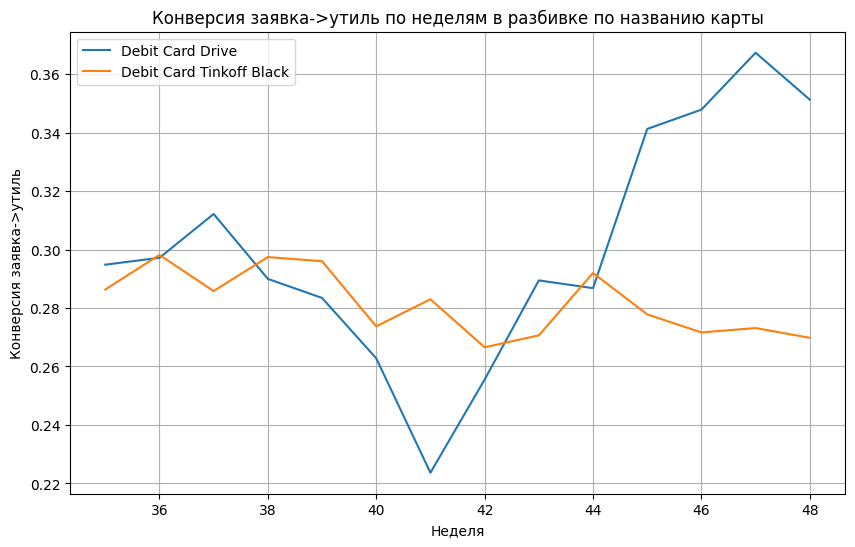

In [26]:
plt.figure(figsize=(10, 6))

for product_name, data in weekly_conversion.groupby('product_name'):
    plt.plot(data['week'], data['conversation_to_utilization'], label=product_name)

plt.xlabel('Неделя')
plt.ylabel('Конверсия заявка->утиль')
plt.title('Конверсия заявка->утиль по неделям в разбивке по названию карты')
plt.legend()
plt.grid(True)
plt.show()

#Задание 5.
Найти самый конверсионный сегмент пользователей,напечатать его характеристики и данные по конверсии. Рассматриваем конверсию из заявки в утиль. Обратите внимание, что это задание на анализ, а не на поиск максимума в датасете. Дополните ваш ответ комментариями, почему вы выделили именно такие сегменты и опишите, как вы их анализировали.

Первым делом я решил посмотреть на *hot-map* распределения конверсии по портрету пользователей(возраст, регион), чтобы определить самый конверсионный сегмент по данному признаку.

<ipython-input-27-5465d79ab892>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = conversion_by_age_region.pivot('age', 'region_size', 'Conversion to Utilizations')


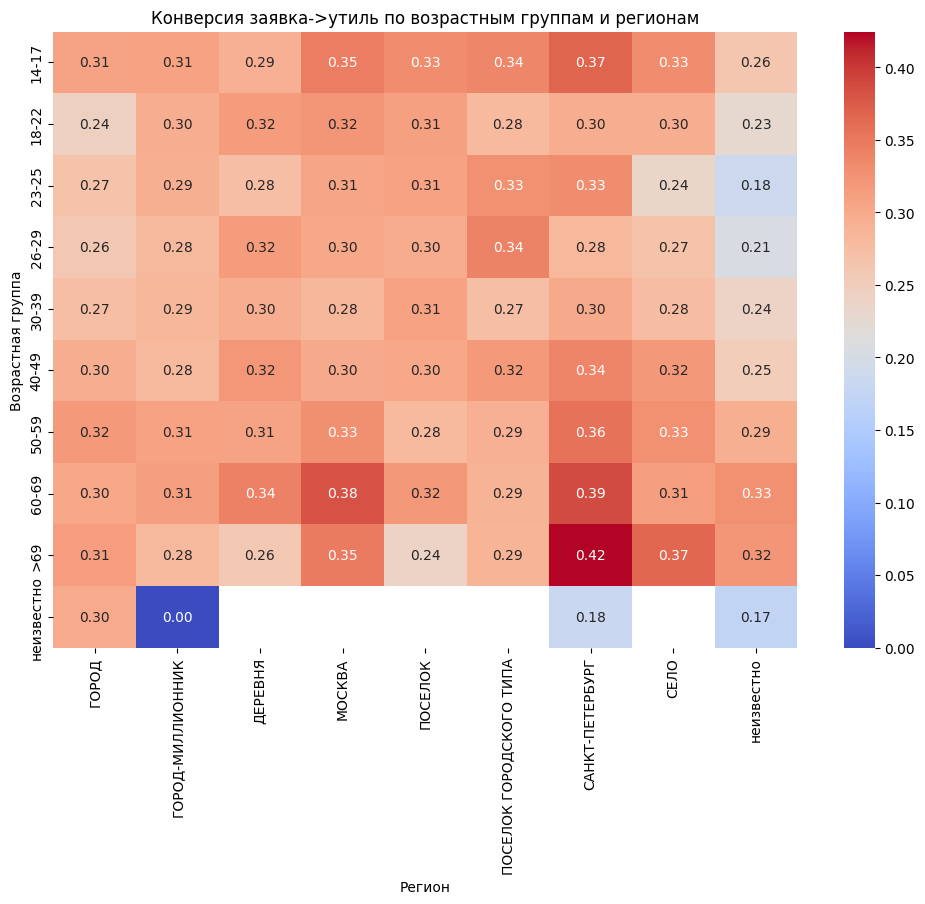

In [27]:
conversion_by_age_region = df.groupby(['age', 'region_size']).agg({
    'apps': 'sum',
    'utilizations': 'sum'
}).reset_index()

conversion_by_age_region['Conversion to Utilizations'] = conversion_by_age_region['utilizations'] / conversion_by_age_region['apps']

plt.figure(figsize=(12, 8))
pivot_table = conversion_by_age_region.pivot('age', 'region_size', 'Conversion to Utilizations')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f', xticklabels=pivot_table.columns, yticklabels=pivot_table.index)
plt.title('Конверсия заявка->утиль по возрастным группам и регионам')
plt.xlabel('Регион')
plt.ylabel('Возрастная группа')
plt.show()

Как можно заметить, в освноном пик конверсии приходится на столичные города и пожилую часть людей, это может быть вызвано тем, что к крупных городах потребность в карте гораздо выше, а также людям в возрасте необходима карта по множеству причин, пенсия, льготы, предоставляемые банком, а также кэшбеки. Остальные же категории в среднем имеют общее значение конверсии, выделяется небольшой разницей категория подростков, которые могли узнать о карте из рекламных каналах и решили оформить как первую основную дебетовую карту, а по регионам выделяются также в своей основе столичные города.

Теперь оценим распределение конверсии по типу устройств:

In [28]:
conversion_by_segment_device = df.groupby('device_type').agg({
    'apps': 'sum',
    'utilizations': 'sum'
}).reset_index()

conversion_by_segment_device['Conversion to Utilizations'] = conversion_by_segment_device['utilizations'] / conversion_by_segment_device['apps']

max_conversion_segment_device = conversion_by_segment_device.loc[conversion_by_segment_device['Conversion to Utilizations'].idxmax()]

print("Самый конверсионный сегмент:")
print(max_conversion_segment_device)

Самый конверсионный сегмент:
device_type                    desktop
apps                             79286
utilizations                     24116
Conversion to Utilizations    0.304165
Name: 0, dtype: object


Как было вычислено, больше всего конверсия с станционарного устройства. Также посмотрим на конверсию по карточному продукту.

In [29]:
conversion_by_segment_product = df.groupby('product_name').agg({
    'apps': 'sum',
    'utilizations': 'sum'
}).reset_index()

conversion_by_segment_product['Conversion to Utilizations'] = conversion_by_segment_product['utilizations'] / conversion_by_segment_product['apps']

max_conversion_segment_product = conversion_by_segment_product.loc[conversion_by_segment_product['Conversion to Utilizations'].idxmax()]

print("Самый конверсионный сегмент:")
print(max_conversion_segment_product)

Самый конверсионный сегмент:
product_name                  Debit Card Drive
apps                                     75117
utilizations                             21729
Conversion to Utilizations            0.289269
Name: 0, dtype: object


Из расчётов выше мы видим, что самый конверсионный сегмент - это дебетовая карта *"Debit Card Drive"*. Осталось оценить конверсию по рекламным каналам.

In [30]:
conversion_by_segment_channel = df.groupby('channel_name').agg({
    'apps': 'sum',
    'utilizations': 'sum'
}).reset_index()

conversion_by_segment_channel['Conversion to Utilizations'] = conversion_by_segment_channel['utilizations'] / conversion_by_segment_channel['apps']

max_conversion_segment_channel = conversion_by_segment_channel.loc[conversion_by_segment_channel['Conversion to Utilizations'].idxmax()]

print("Самый конверсионный сегмент:")
print(max_conversion_segment_channel)

Самый конверсионный сегмент:
channel_name                  Поисковая оптимизация
apps                                          85326
utilizations                                  26977
Conversion to Utilizations                 0.316164
Name: 4, dtype: object


##**Подведение итогов:**
Самый конверсионный сегмент:


*   Тип устройства - ПК
*   Карточный продукт - Debit Card Drive
*   Рекламный канал - Поисковая оптимизация
*   Возрастная категория - 60-69 лет
*   Тип региона - столичные города(Москва, Санкт-Петербург)

